In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('data_stocks.csv')

In [5]:
data = data.drop(['DATE'], axis=1)

In [6]:
data.shape

(41266, 501)

In [7]:
data['SP500'] = data['SP500'].shift(-1)
data['SP500']

0        2364.1001
1        2362.6799
2        2364.3101
3        2364.8501
4        2365.6201
           ...    
41261    2471.7700
41262    2470.0300
41263    2471.4900
41264    2471.4900
41265          NaN
Name: SP500, Length: 41266, dtype: float64

In [8]:
data = data.dropna(axis=0)
data['SP500']

0        2364.1001
1        2362.6799
2        2364.3101
3        2364.8501
4        2365.6201
           ...    
41260    2472.2200
41261    2471.7700
41262    2470.0300
41263    2471.4900
41264    2471.4900
Name: SP500, Length: 41265, dtype: float64

In [9]:
data_a = np.array(data)

In [10]:
data = []
data

[]

In [11]:
n = data_a.shape[0]
train_start = 0
train_end = int(np.floor(0.8*n))
print(train_end)

33012


In [12]:
train_end -= 12
print(train_end)

33000


In [13]:
test_start = train_end
test_end = n

data_train = data_a[np.arange(train_start,train_end), :]
data_test = data_a[np.arange(test_start, test_end), :]

In [14]:
print('Data for training: ', data_train.shape)
print('Data for testing: ', data_test.shape)

Data for training:  (33000, 501)
Data for testing:  (8265, 501)


In [15]:
data_a = []
data_a

[]

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
scaler.fit(data_train)

data_train_norm = scaler.transform(data_train)
data_test_norm = scaler.transform(data_test)

In [18]:
print(data_train_norm.min())
print(data_train_norm.max(), '\n')

print(data_test_norm.min())
print(data_test_norm.max())

0.0
1.0000000000000018 

-1.7208737864077674
2.115201718054915


In [19]:
x_train = data_train_norm[:, 1:]
y_train = data_train_norm[:, 0]
x_test = data_test_norm[:, 1:]
y_test = data_test_norm[:, 0]

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33000, 500)
(33000,)
(8265, 500)
(8265,)


In [1]:
import tensorflow as tf
from tensorflow import keras

In [21]:
#SID: 2355846 | 1st Layer = 846, 2nd Layer = 423
model = keras.Sequential([
    keras.layers.Dense(846, input_dim=500, activation=tf.nn.relu, kernel_initializer="normal"),
    keras.layers.Dense(423, activation='relu', kernel_initializer="normal"),
    keras.layers.Dense(212, activation='relu', kernel_initializer="normal"),
    keras.layers.Dense(106, activation='relu', kernel_initializer="normal"),

    keras.layers.Dense(1)
])

print(model.summary())

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 846)            │       423,846 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 423)            │       358,281 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 212)            │        89,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 106)            │        22,578 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           107 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 894,700 (3.41 MB)

 Trainable params: 894,700 (3.41 MB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [23]:
history = model.fit(x_train, y_train, batch_size = 10, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - loss: 0.0057 - mae: 0.0275 - val_loss: 0.0057 - val_mae: 0.0686
Epoch 2/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 2.4777e-04 - mae: 0.0118 - val_loss: 9.1205e-04 - val_mae: 0.0235
Epoch 3/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 1.3125e-04 - mae: 0.0087 - val_loss: 8.6476e-04 - val_mae: 0.0244
Epoch 4/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 1.2228e-04 - mae: 0.0085 - val_loss: 0.0013 - val_mae: 0.0329
Epoch 5/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 9.2571e-05 - mae: 0.0074 - val_loss: 2.5280e-04 - val_mae: 0.0118
Epoch 6/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 9.4183e-05 - mae: 0.0074 - val_loss: 2.0997e-04 - val_mae: 0.0109
Epoch 7/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 7.1092e-05 - mae: 0.0064 - val_loss: 2.5484e-04 - val_mae: 0.0121
Epoch 8/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 7.0219e-05 - mae: 0.0062 - val_loss: 0.0010 - 

In [24]:
mse, mae = model.evaluate(x_test, y_test, verbose=0)
print("Mean absolute error: %.5f" % mae)
print("Mean squared error: %.5f" % mse)

Mean absolute error: 0.02594
Mean squared error: 0.00105


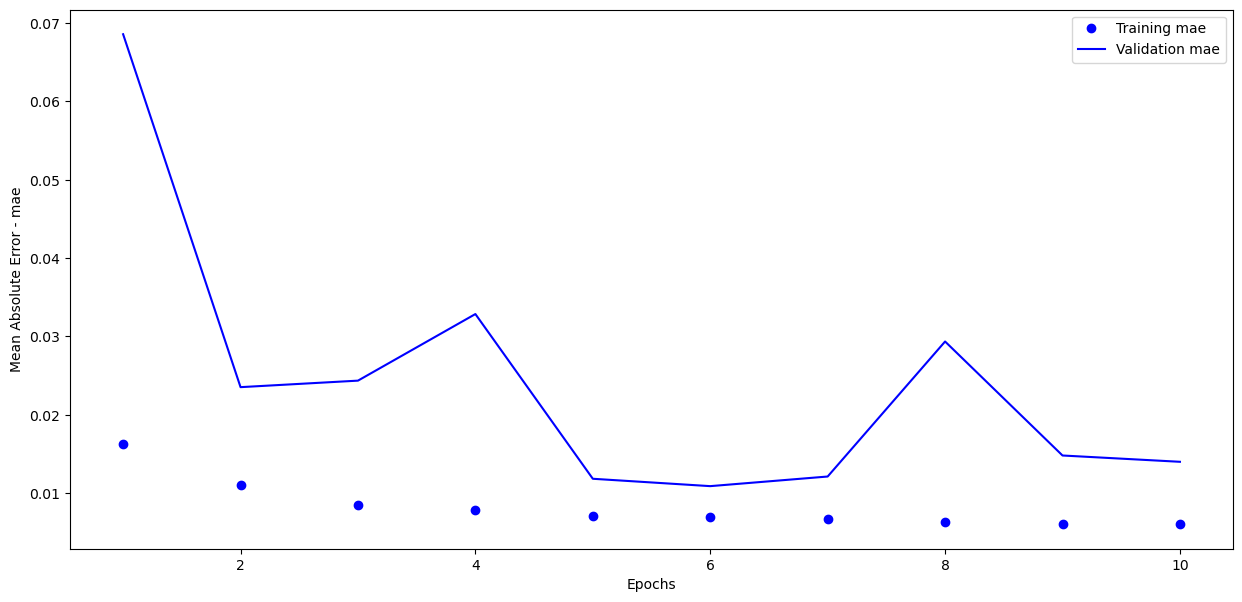

In [25]:
history_dict = history.history

mean_absolute_error_values = history_dict['mae']
val_mean_absolute_error_values = history_dict['val_mae']
epochs = range(1, len(mean_absolute_error_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mean_absolute_error_values, 'bo', label='Training mae')
plt.plot(epochs, val_mean_absolute_error_values, 'b', label='Validation mae')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error - mae')
plt.legend()
plt.show()

In [26]:
sp500_min_train_min = data_train[:,0].min()
sp500_min_train_max = data_train[:,0].max()

print(sp500_min_train_min, '\n',
     sp500_min_train_max)

2329.1399 
 2482.8701


In [27]:
sp500_min_train_delta = data_train[:,0].max() - data_train[:,0].min()
sp500_min_train_delta

153.73019999999997

In [28]:
import random

pred = model.predict(x_test)

n_rec = random.randint(0, x_test.shape[0])

predicted_price = pred[n_rec][0] * sp500_min_train_delta + sp500_min_train_min
actual_price    = y_test[n_rec]  * sp500_min_train_delta + sp500_min_train_min

print(" Predicted price:", predicted_price, '\n' , 
      "Actual price:", actual_price, '\n', 
      "absolute error:", predicted_price - actual_price, '\n',
      "% absolute error:", (predicted_price - actual_price) / actual_price * 100,"%")

259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
 Predicted price: 2470.000508843613 
 Actual price: 2469.3401 
 absolute error: 0.6604088436129132 
 % absolute error: 0.026744345325818555 %


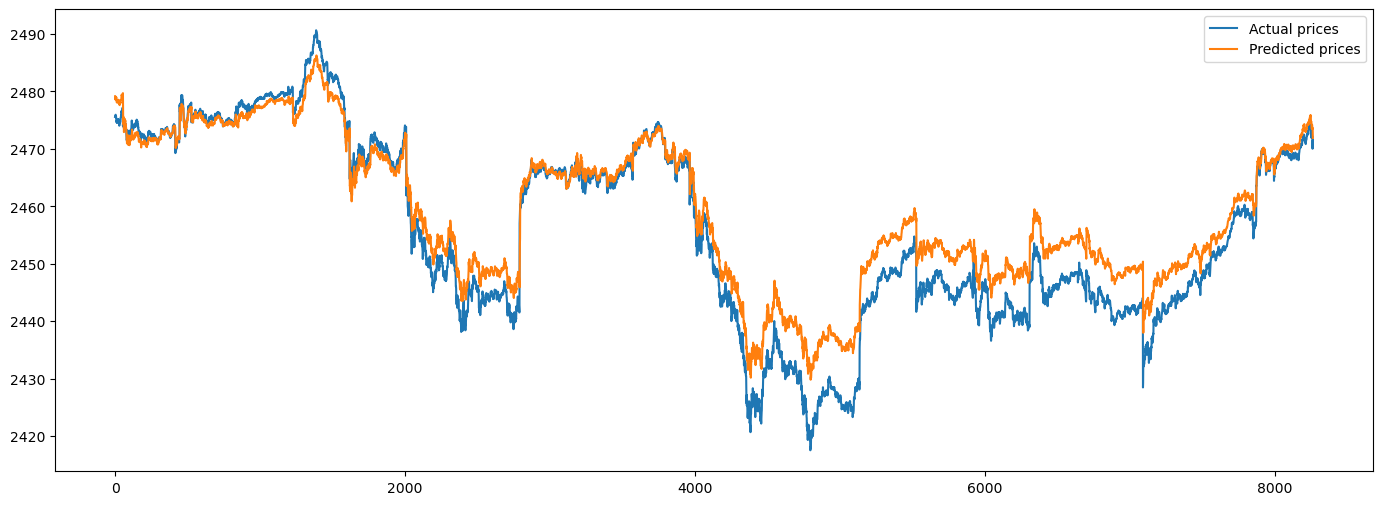

In [29]:
fig = plt.figure(figsize=(17,6)) 
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test * sp500_min_train_delta + sp500_min_train_min)
line2, = ax1.plot(pred[:,0] * sp500_min_train_delta + sp500_min_train_min)
plt.legend(labels=['Actual prices', 'Predicted prices'], loc='upper right')

plt.show();

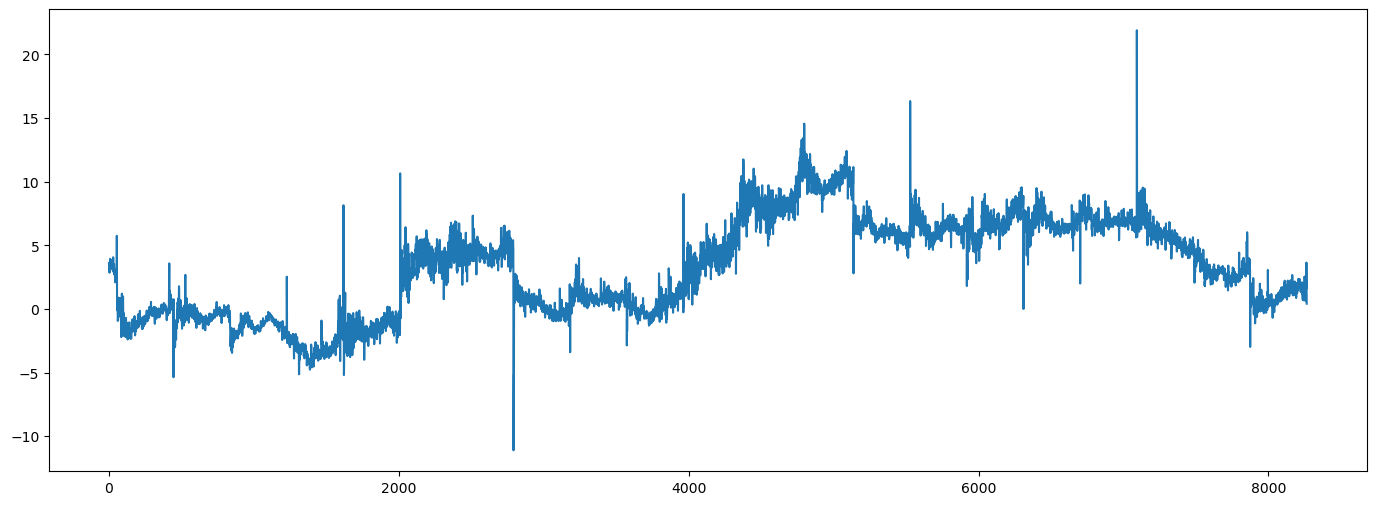

In [31]:
plt.ion()
fig = plt.figure(figsize=(17,6)) 
ax1 = fig.add_subplot(111)

a = (pred[:,0]-y_test) * sp500_min_train_delta
line1, = ax1.plot(a)

plt.show()